<a href="https://colab.research.google.com/github/NinaAbeyratne/Analysing_HCHO_gas_in_Sri_Lanka/blob/main/Spatio_Temporal_Analysis_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
from sklearn.impute import KNNImputer
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
merged_data = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/merged_dataset.csv')

### Dropping Unnessary Columns

In [6]:
# Drop the 'TMAX' and 'TMIN' columns from the merged_data
merged_data.drop(['TMAX', 'TMIN'], axis=1, inplace=True)

In [7]:
merged_data

,HCHO_reading,City,Date,PRCP,TAVG
0,0.000197,Colombo Proper,2019-01-01,0.00,81
1,0.000116,Nuwara Eliya Proper,2019-01-01,0.00,61
2,0.000263,Colombo Proper,2019-01-02,0.00,78
3,0.000137,Kurunegala Proper,2019-01-02,0.00,78
4,0.000116,Nuwara Eliya Proper,2019-01-02,0.00,59
...,...,...,...,...,...
5225,0.000158,Kurunegala Proper,2023-12-30,0.47,80
5226,0.000140,Colombo Proper,2023-12-30,0.10,81
5227,0.000158,Kurunegala Proper,2023-12-31,0.06,79
5228,0.000080,Colombo Proper,2023-12-31,0.33,81


## Checking for Missing Values

In [8]:
# Check for missing data in the merged dataset
missing_data = merged_data.isnull().sum()

# Print the number of missing values for each column
print("Missing Data:")
print(missing_data)

Missing Data:
HCHO_reading     0
City             0
Date             0
PRCP            17
TAVG             0
dtype: int64


## Using ML algorithm ro replace missing values

In [9]:
# Select only the numeric columns for imputation
numeric_columns = ['PRCP', 'TAVG']
merged_data_numeric = merged_data[numeric_columns]

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values for numeric columns
merged_data_imputed_numeric = pd.DataFrame(imputer.fit_transform(merged_data_numeric), columns=numeric_columns)

# Combine imputed numeric columns with non-numeric columns
merged_data_imputed = pd.concat([merged_data[['HCHO_reading', 'City', 'Date']], merged_data_imputed_numeric], axis=1)

In [10]:
# Check for missing data in the merged dataset
missing_data = merged_data_imputed.isnull().sum()

# Print the number of missing values for each column
print("Missing Data:")
print(missing_data)

Missing Data:
HCHO_reading    0
City            0
Date            0
PRCP            0
TAVG            0
dtype: int64


# Statistics

In [11]:
statistics = merged_data_imputed.describe()

In [12]:
statistics

,HCHO_reading,PRCP,TAVG
count,5230.000000,5230.000000,5230.000000
mean,0.000122,0.245725,74.951816
std,0.000095,0.569074,10.221190
min,-0.000229,0.000000,51.000000
25%,0.000058,0.000000,62.000000
50%,0.000116,0.000000,80.000000
75%,0.000180,0.200000,83.000000
max,0.000426,7.430000,92.000000


In [13]:
# Calculate mean for each column
mean_hcho = merged_data_imputed['HCHO_reading'].mean()
mean_prcp = merged_data_imputed['PRCP'].mean()
mean_tavg = merged_data_imputed['TAVG'].mean()

# Calculate median for each column
median_hcho = merged_data_imputed['HCHO_reading'].median()
median_prcp = merged_data_imputed['PRCP'].median()
median_tavg = merged_data_imputed['TAVG'].median()

# Calculate standard deviation for each column
std_hcho = merged_data_imputed['HCHO_reading'].std()
std_prcp = merged_data_imputed['PRCP'].std()
std_tavg = merged_data_imputed['TAVG'].std()

# Print the calculated statistics
print("HCHO Statistics:")
print("Mean:", mean_hcho)
print("Median:", median_hcho)
print("Standard Deviation:", std_hcho)
print("\nPRCP Statistics:")
print("Mean:", mean_prcp)
print("Median:", median_prcp)
print("Standard Deviation:", std_prcp)
print("\nTAVG Statistics:")
print("Mean:", mean_tavg)
print("Median:", median_tavg)
print("Standard Deviation:", std_tavg)

HCHO Statistics:
Mean: 0.00012198800855599573
Median: 0.0001160963242857
Standard Deviation: 9.517822487804616e-05

PRCP Statistics:
Mean: 0.24572466539196938
Median: 0.0
Standard Deviation: 0.569073849671072

TAVG Statistics:
Mean: 74.95181644359465
Median: 80.0
Standard Deviation: 10.22118980012386


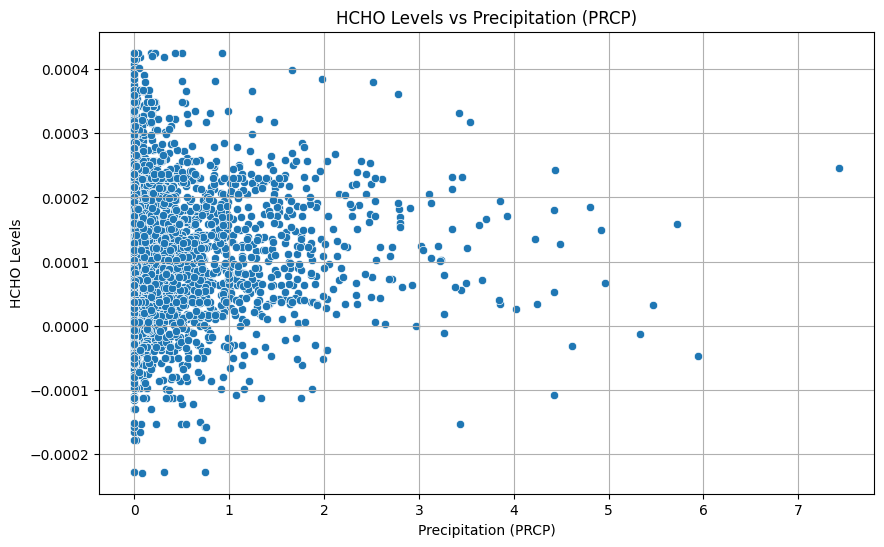

In [14]:
# Scatter plot for HCHO vs PRCP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_imputed, x='PRCP', y='HCHO_reading')
plt.title('HCHO Levels vs Precipitation (PRCP)')
plt.xlabel('Precipitation (PRCP)')
plt.ylabel('HCHO Levels')
plt.grid(True)
plt.show()

In [15]:
# Calculate the correlation coefficient between HCHO levels and precipitation
correlation_coefficient = merged_data_imputed['HCHO_reading'].corr(merged_data_imputed['PRCP'])
print('Correlation Coefficient (HCHO vs PRCP):', correlation_coefficient)

Correlation Coefficient (HCHO vs PRCP): -0.03382009557937122


The correlation coefficient indicates a very weak negative relationship between HCHO and precipitation.
This means there's almost no statistically significant linear trend between the two variables.

Measurement errors or a non-linear relationship could weaken the observed correlation.

Limitations:

The analysis cannot establish causation (precipitation causing HCHO changes).
It doesn't account for potential interactions with other variables.

While there might be some underlying connection between HCHO and precipitation, the current analysis suggests a negligible linear relationship.

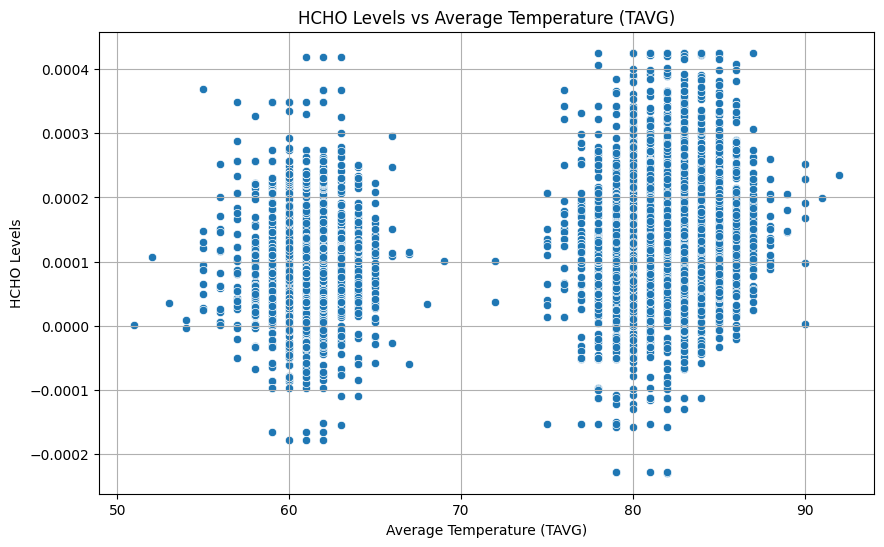

In [16]:
# Scatter plot for HCHO vs TAVG
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_imputed, x='TAVG', y='HCHO_reading')
plt.title('HCHO Levels vs Average Temperature (TAVG)')
plt.xlabel('Average Temperature (TAVG)')
plt.ylabel('HCHO Levels')
plt.grid(True)
plt.show()

In [17]:
# Calculate the correlation coefficient between HCHO levels and average tempreture
correlation_coefficient = merged_data_imputed['HCHO_reading'].corr(merged_data_imputed['TAVG'])
print('Correlation Coefficient (HCHO vs TAVG):', correlation_coefficient)

Correlation Coefficient (HCHO vs TAVG): 0.24571481600359854


 0.2457 is a weak positive correlation. There's a slight tendency for HCHO levels to increase with higher average temperatures, but it's not a very strong trend.

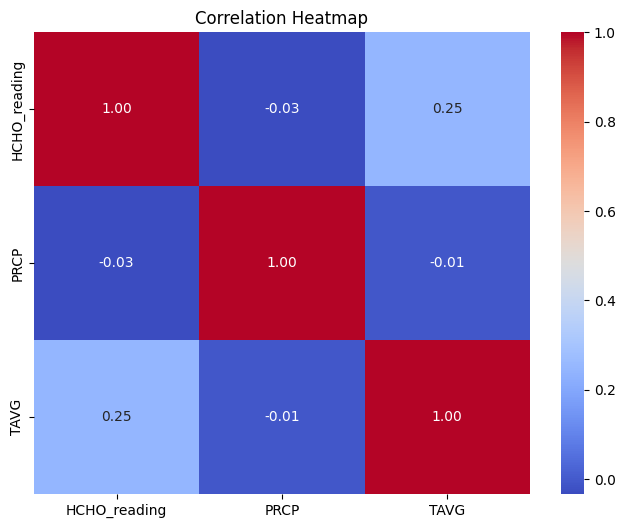

In [18]:
# Calculate correlation matrix
correlation_matrix = merged_data_imputed[['HCHO_reading', 'PRCP', 'TAVG']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## External Factors

In [19]:
# Prepare the altitude and population data
altitude_population_data = {
    'City': ['Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper', 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper', 'Kandy Proper'],
    'Altitude(m)': [3, 200, 1868, 175, 116, 10, 500],
    'Population': [752993, 809344, 27500, 38386, 1610299, 88138, 125400]
}
altitude_population_df = pd.DataFrame(altitude_population_data)

In [20]:
# Merge with HCHO data
merged_data_with_altitude_population = pd.merge(merged_data_imputed, altitude_population_df, on='City')

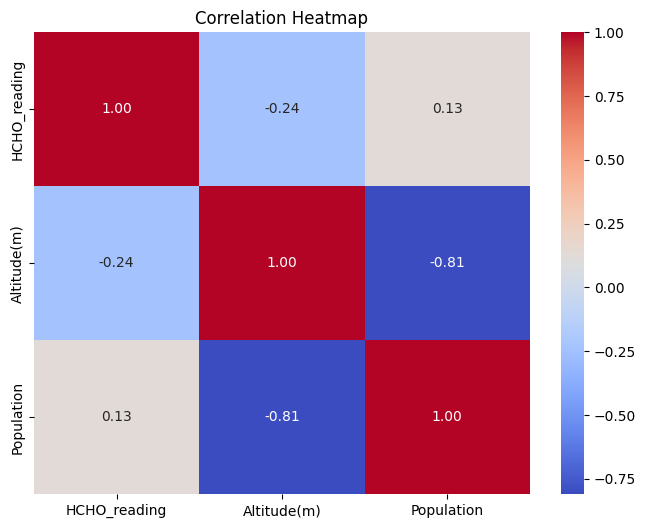

In [21]:
# Calculate correlation matrix
correlation_matrix = merged_data_with_altitude_population[['HCHO_reading', 'Altitude(m)', 'Population']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Model Training

In [22]:
# Preprocess the data
merged_data_with_altitude_population['Date'] = pd.to_datetime(merged_data_with_altitude_population['Date'])
merged_data_with_altitude_population.set_index('Date', inplace=True)

In [23]:
# Check for stationarity
def check_stationarity(data):
    result = adfuller(data)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [24]:
# Check unique values of relevant columns after conversion
print(merged_data_with_altitude_population['HCHO_reading'].unique())
print(merged_data_with_altitude_population['PRCP'].unique())
print(merged_data_with_altitude_population['TAVG'].unique())

# Find and handle remaining non-numeric values
non_numeric_hcho = merged_data_with_altitude_population[~merged_data_with_altitude_population['HCHO_reading'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_prcp = merged_data_with_altitude_population[~merged_data_with_altitude_population['PRCP'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_tavg = merged_data_with_altitude_population[~merged_data_with_altitude_population['TAVG'].apply(lambda x: isinstance(x, (int, float)))]

# Display rows with non-numeric values
print("Rows with non-numeric HCHO values:")
print(non_numeric_hcho)

print("Rows with non-numeric PRCP values:")
print(non_numeric_prcp)

print("Rows with non-numeric TAVG values:")
print(non_numeric_tavg)


[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.59843166e-04
 7.54708547e-05 1.57848076e-04]
[0.    0.52  0.06  0.02  2.78  0.09  0.85  1.44  0.49  0.01  0.17  0.46
 0.91  0.19  0.64  0.99  0.22  0.4   0.86  2.05  0.43  1.15  0.04  0.03
 0.41  0.33  1.66  1.63  0.1   0.12  0.11  0.07  0.38  0.32  0.08  2.91
 0.28  1.39  0.88  0.18  0.15  1.73  0.14  1.97  0.24  0.69  0.13  1.23
 2.03  0.16  0.42  2.02  0.8   1.76  2.29  1.07  4.42  0.26  0.37  0.23
 4.96  3.5   1.33  0.45  0.59  0.95  1.04  0.63  1.53  0.2   0.65  1.3
 0.83  0.54  0.21  0.67  0.35  1.87  0.96  0.72  0.87  0.05  0.78  0.73
 1.11  2.09  1.31  1.5   3.23  2.24  1.16  2.34  0.57  0.36  1.77  0.44
 1.37  0.79  0.7   0.34  1.62  3.35  1.08  1.27  0.3   3.42  1.24  0.31
 0.71  2.    1.46  1.79  5.94  0.47  0.9   0.76  1.13  1.52  0.39  1.41
 0.48  0.212 4.61  4.44  0.74  0.98  0.29  1.03  0.078 0.6   2.3   1.92
 1.1   3.86  3.04  1.36  1.38  1.88  1.48  0.5   5.33  1.28  0.25  1.01
 2.22  1.93  0.92  1.69  1.    1.58  0.2

In [25]:

# Differencing to achieve stationarity if necessary
hcho_data_diff = merged_data_with_altitude_population['HCHO_reading'].diff().dropna()

# Check stationarity of differenced data
check_stationarity(hcho_data_diff)


ADF Statistic: -19.66136168653929
p-value: 0.0
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [26]:
merged_data_with_altitude_population.describe()

,HCHO_reading,PRCP,TAVG,Altitude(m),Population
count,5230.000000,5230.000000,5230.000000,5230.000000,5.230000e+03
mean,0.000122,0.245725,74.951816,667.783365,7.880324e+05
std,0.000095,0.569074,10.221190,856.458538,6.446239e+05
min,-0.000229,0.000000,51.000000,3.000000,2.750000e+04
25%,0.000058,0.000000,62.000000,3.000000,2.750000e+04
50%,0.000116,0.000000,80.000000,116.000000,7.529930e+05
75%,0.000180,0.200000,83.000000,1868.000000,1.610299e+06
max,0.000426,7.430000,92.000000,1868.000000,1.610299e+06


ARIMA model

In [27]:
# # Fit ARIMA model
# model = ARIMA(hcho_data_diff, order=(5,1,0))  # may need to tune these parameters
# model_fit = model.fit()
# print(model_fit.summary())

# # Fit ARIMA model
# model = ARIMA(hcho_data_diff, order=(5,1,0), seasonal_order=(1,0,1,365))
# model_fit = model.fit()
# print(model_fit.summary())

# Fit ARIMA model
model = ARIMA(hcho_data_diff, order=(5,1,0), seasonal_order=(1,0,1,12))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                                     SARIMAX Results                                      
Dep. Variable:                       HCHO_reading   No. Observations:                 5229
Model:             ARIMA(5, 1, 0)x(1, 0, [1], 12)   Log Likelihood               41275.315
Date:                            Fri, 19 Apr 2024   AIC                         -82534.631
Time:                                    14:25:57   BIC                         -82482.137
Sample:                                         0   HQIC                        -82516.274
                                           - 5229                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1622   7.16e-20  -1.62e+19      0.000      -1.162      -1.162
ar.L2         -1.0528   1.25e-20  -

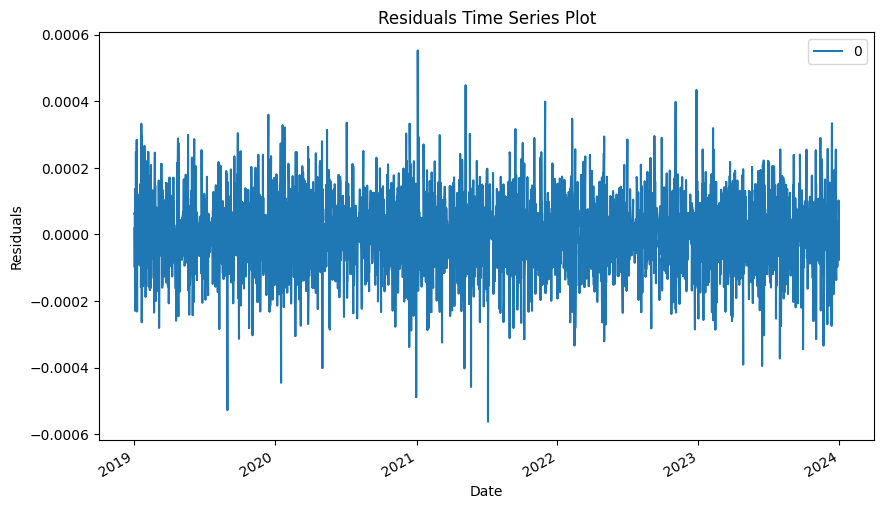

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(10, 6))
plt.title('Residuals Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

In [31]:
# Evaluate model performance
predictions_diff = model_fit.forecast(steps=len(hcho_data_diff))
index = hcho_data_diff.index
start_index = index[-1] + pd.DateOffset(days=1)
end_index = start_index + pd.DateOffset(days=len(predictions_diff) - 1)
predictions_index = pd.date_range(start=start_index, end=end_index)
predictions = hcho_data_diff.iloc[-1] + np.cumsum(predictions_diff)
predictions.index = predictions_index
mse = mean_squared_error(hcho_data_diff, predictions_diff)
print('Mean Squared Error:', mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 8.018781035184338e-09


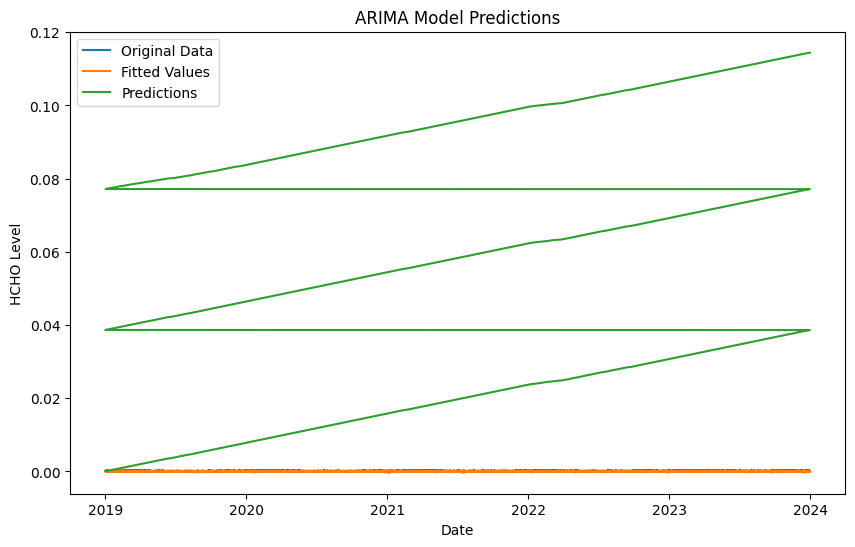

In [32]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(merged_data_with_altitude_population.index, merged_data_with_altitude_population['HCHO_reading'], label='Original Data')
plt.plot(hcho_data_diff.index, hcho_data_diff.iloc[0] + np.cumsum(model_fit.fittedvalues), label='Fitted Values')
plt.plot(hcho_data_diff.index, hcho_data_diff.iloc[0] + np.cumsum(predictions_diff), label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('HCHO Level')
plt.legend()
plt.show()

In [33]:
# Calculate Mean Squared Error
mse = mean_squared_error(hcho_data_diff, predictions_diff)
print('Mean Squared Error (MSE):', mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(hcho_data_diff, predictions_diff)
print('Mean Absolute Error (MAE):', mae)

# Calculate R-squared
r2 = r2_score(hcho_data_diff, predictions_diff)
print('R-squared (R^2):', r2)

Mean Squared Error (MSE): 8.018781035184338e-09
Mean Absolute Error (MAE): 6.149903960774332e-05
R-squared (R^2): -0.06365137027866141


# Random Forest Claasifier

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
merged_data_with_altitude_population.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5230 entries, 2019-01-01 to 2023-12-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO_reading  5230 non-null   float64
 1   City          5230 non-null   object 
 2   PRCP          5230 non-null   float64
 3   TAVG          5230 non-null   float64
 4   Altitude(m)   5230 non-null   int64  
 5   Population    5230 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 286.0+ KB


In [36]:
# Prepare the data
X = merged_data_with_altitude_population[['PRCP', 'TAVG', 'Altitude(m)', 'Population']]
y = merged_data_with_altitude_population['HCHO_reading']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Evaluate the model's performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)


Mean Squared Error (MSE): 9.26207311806498e-09
Mean Absolute Error (MAE): 7.55759561946745e-05
R-squared (R^2): -0.0009352969578300119


# LSTM (Lomg short term memory)

In [40]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
# Extracting the target variable (HCHO_reading) and features (PRCP, TAVG, Altitude(m), Population)
X = merged_data_with_altitude_population[['PRCP', 'TAVG', 'Altitude(m)', 'Population']].values
y = merged_data_with_altitude_population['HCHO_reading'].values

In [42]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
# Reshape the input data for LSTM (samples, time steps, features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

In [45]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Epoch 1/100
66/66 - 4s - loss: 4.2733e-05 - val_loss: 3.2992e-07 - 4s/epoch - 62ms/step
Epoch 2/100
66/66 - 0s - loss: 6.1383e-08 - val_loss: 3.9036e-08 - 295ms/epoch - 4ms/step
Epoch 3/100
66/66 - 0s - loss: 3.0214e-08 - val_loss: 2.7843e-08 - 267ms/epoch - 4ms/step
Epoch 4/100
66/66 - 0s - loss: 2.3745e-08 - val_loss: 2.1757e-08 - 285ms/epoch - 4ms/step
Epoch 5/100
66/66 - 0s - loss: 2.0599e-08 - val_loss: 1.9543e-08 - 259ms/epoch - 4ms/step
Epoch 6/100
66/66 - 0s - loss: 1.8525e-08 - val_loss: 1.6322e-08 - 265ms/epoch - 4ms/step
Epoch 7/100
66/66 - 0s - loss: 1.6257e-08 - val_loss: 1.5592e-08 - 265ms/epoch - 4ms/step
Epoch 8/100
66/66 - 0s - loss: 1.4799e-08 - val_loss: 1.4657e-08 - 294ms/epoch - 4ms/step
Epoch 9/100
66/66 - 0s - loss: 1.4257e-08 - val_loss: 1.5100e-08 - 284ms/epoch - 4ms/step
Epoch 10/100
66/66 - 0s - loss: 1.3496e-08 - val_loss: 1.5417e-08 - 265ms/epoch - 4ms/step
Epoch 11/100
66/66 - 0s - loss: 1.2988e-08 - val_loss: 1.7859e-08 - 362ms/epoch - 5ms/step
Epoch 12/1

In [47]:
# Make predictions
y_pred = model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [48]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 1.416815076635482e-07


In [49]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 0.0003374519708162167


In [50]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.00037640604094986066


In [51]:
r2 = r2_score(y_test, y_pred)
print('R-squared (R^2):', r2)

R-squared (R^2): -14.311261327666378


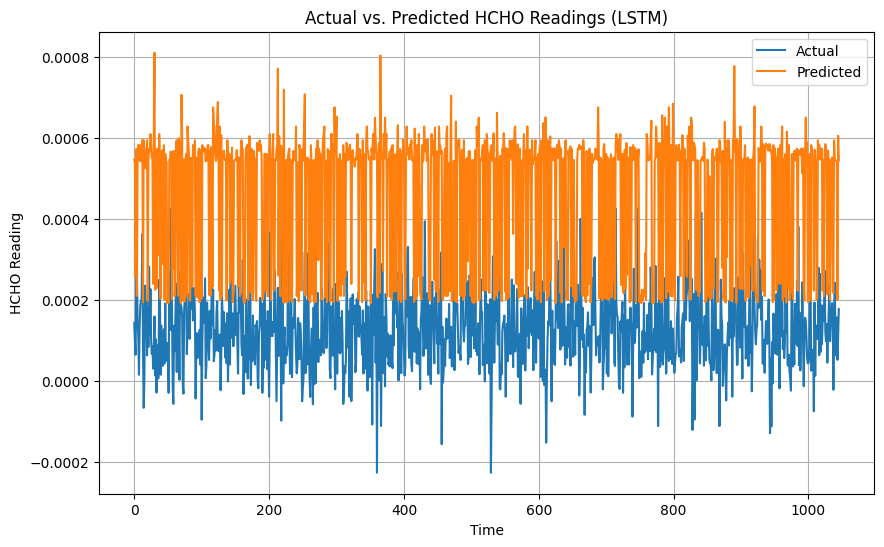

In [52]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted HCHO Readings (LSTM)')
plt.xlabel('Time')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

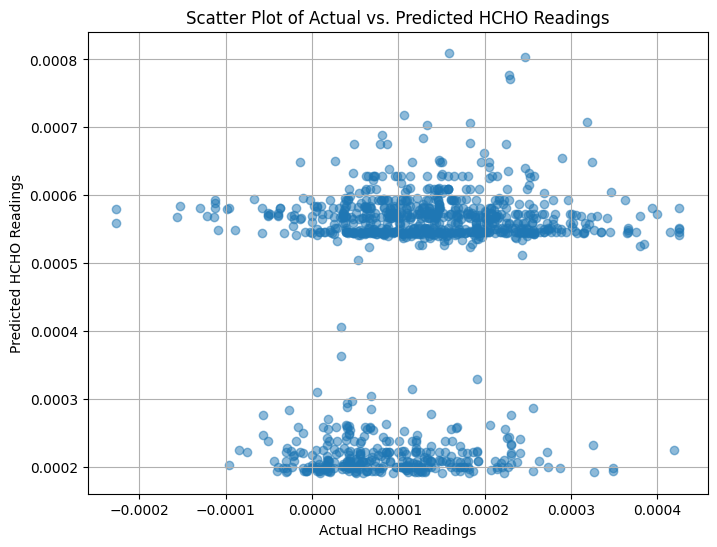

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted HCHO Readings')
plt.xlabel('Actual HCHO Readings')
plt.ylabel('Predicted HCHO Readings')
plt.grid(True)
plt.show()

## SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 7.641574227603591e-09
R2 Score: 0.15629488579064044


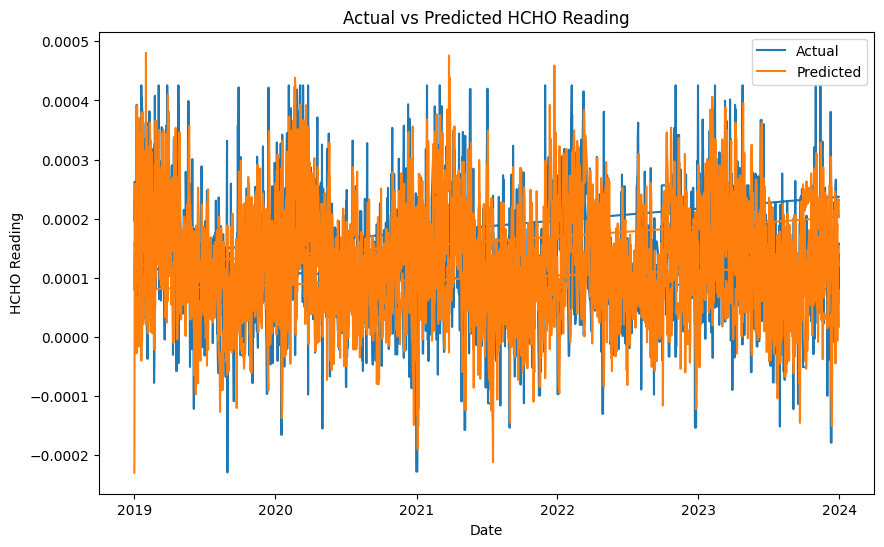

In [54]:
# Define exogenous variables (features)
exog_vars = merged_data_with_altitude_population[['PRCP', 'TAVG', 'Altitude(m)', 'Population']]

# Define and fit the SARIMAX model with exogenous variables
model = SARIMAX(merged_data_with_altitude_population['HCHO_reading'], exog=exog_vars, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.predict(start=0, end=len(merged_data_with_altitude_population) - 1, exog=exog_vars, dynamic=False)

# Calculate mean squared error and R2 score
mse = mean_squared_error(merged_data_with_altitude_population['HCHO_reading'], predictions)
r2 = r2_score(merged_data_with_altitude_population['HCHO_reading'], predictions)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(merged_data_with_altitude_population.index, merged_data_with_altitude_population['HCHO_reading'], label='Actual')
plt.plot(merged_data_with_altitude_population.index, predictions, label='Predicted')
plt.title('Actual vs Predicted HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Location: Colombo Proper
Mean Squared Error: 9.270607459451755e-09
R2 Score: 0.04402613471800865


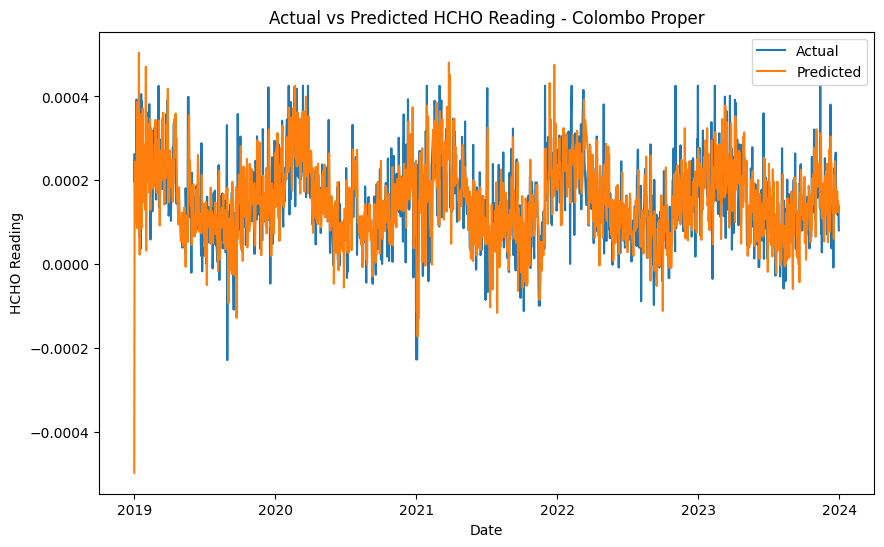

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Location: Nuwara Eliya Proper
Mean Squared Error: 5.954258131452453e-09
R2 Score: 0.1869640322347137


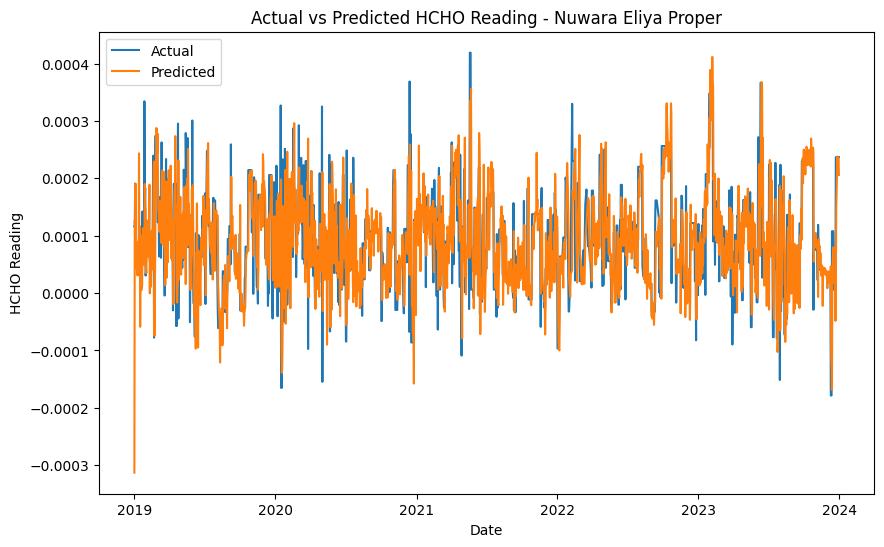

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Location: Kurunegala Proper
Mean Squared Error: 8.38758969472466e-09
R2 Score: -0.019773837984405462


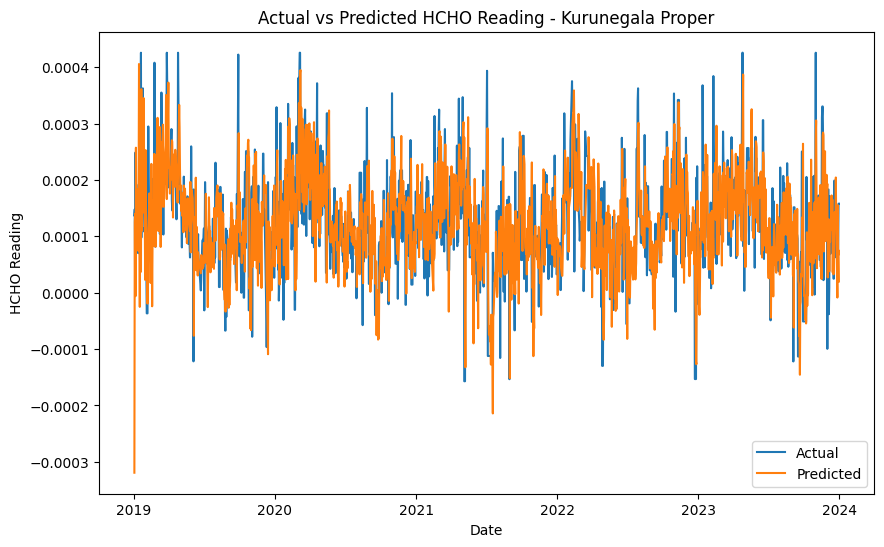

In [55]:
# Get unique locations
locations = merged_data_with_altitude_population['City'].unique()

# Iterate over each location
for City in locations:
    # Filter data for the current City
    location_data = merged_data_with_altitude_population[merged_data_with_altitude_population['City'] == City]

    # Define exogenous variables (features) for the current City
    exog_vars = location_data[['PRCP', 'TAVG', 'Altitude(m)', 'Population']]

    # Define and fit the SARIMAX model with exogenous variables for the current City
    model = SARIMAX(location_data['HCHO_reading'], exog=exog_vars, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Make predictions for the current location
    predictions = model_fit.predict(start=0, end=len(location_data) - 1, exog=exog_vars, dynamic=False)

    # Calculate mean squared error and R2 score for the current location
    mse = mean_squared_error(location_data['HCHO_reading'], predictions)
    r2 = r2_score(location_data['HCHO_reading'], predictions)
    print(f"Location: {City}")
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)

    # Plot actual vs predicted for the current location
    plt.figure(figsize=(10, 6))
    plt.plot(location_data.index, location_data['HCHO_reading'], label='Actual')
    plt.plot(location_data.index, predictions, label='Predicted')
    plt.title(f'Actual vs Predicted HCHO Reading - {City}')
    plt.xlabel('Date')
    plt.ylabel('HCHO Reading')
    plt.legend()
    plt.show()


In [56]:
# downloading the final dataset

from google.colab import files

merged_data_with_altitude_population.to_csv('merged_data_with_altitude_population.csv', index=False)
files.download('merged_data_with_altitude_population.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>